In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings("ignore")


In [19]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 12.2 MB/s eta 0:00:00


In [20]:
from mlxtend.plotting import plot_confusion_matrix

In [4]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)



In [5]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0



In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


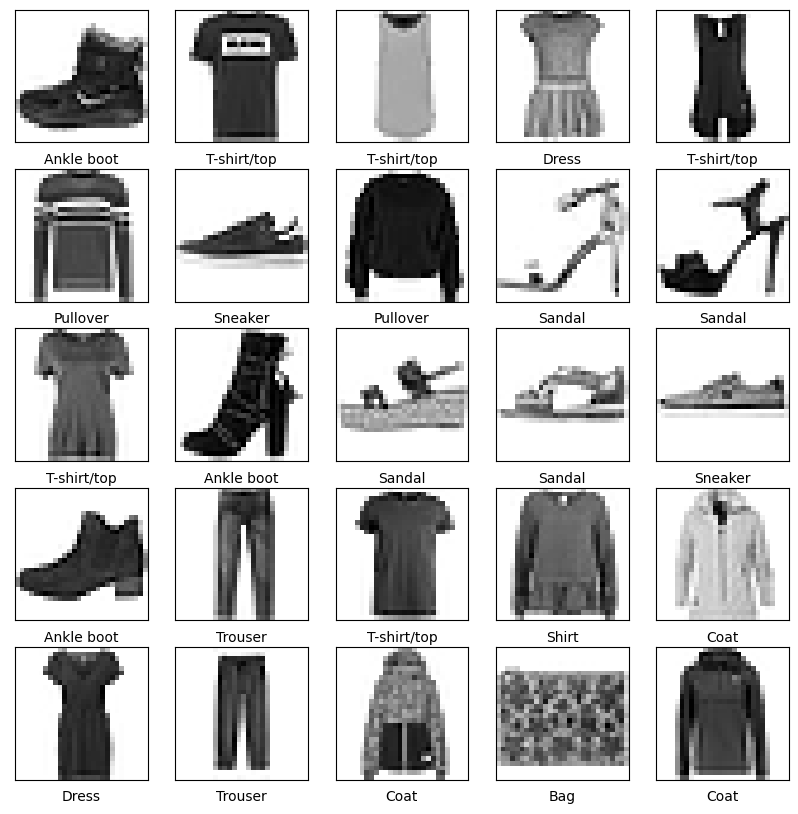

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()


In [10]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])

In [11]:
model.compile(loss="categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])


In [12]:
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))


Epoch 1/10


1875/1875 [==============================] - 13s 7ms/step - loss: 0.8134 - accuracy: 0.7250 - val_loss: 0.6545 - val_accuracy: 0.7665
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5315 - accuracy: 0.8141 - val_loss: 0.4982 - val_accuracy: 0.8325
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4728 - accuracy: 0.8347 - val_loss: 0.4625 - val_accuracy: 0.8450
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4323 - accuracy: 0.8485 - val_loss: 0.4665 - val_accuracy: 0.8377
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4104 - accuracy: 0.8572 - val_loss: 0.4043 - val_accuracy: 0.8591
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3852 - accuracy: 0.8663 - val_loss: 0.4097 - val_accuracy: 0.8614
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3674 - accuracy: 0.8706 - val_loss: 0.3765 - val_

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv-layer-1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 pooling-layer-1 (AveragePo  (None, 14, 14, 64)        0         
 oling2D)                                                        
                                                                 
 conv-layer-2 (Conv2D)       (None, 14, 14, 32)        18464     
                                                                 
 pooling-layer-2 (AveragePo  (None, 7, 7, 32)          0         
 oling2D)                                                        
                                                                 
 pooling-layer-3 (GlobalAve  (None, 32)                0         
 ragePooling2D)                                                  
                                                        

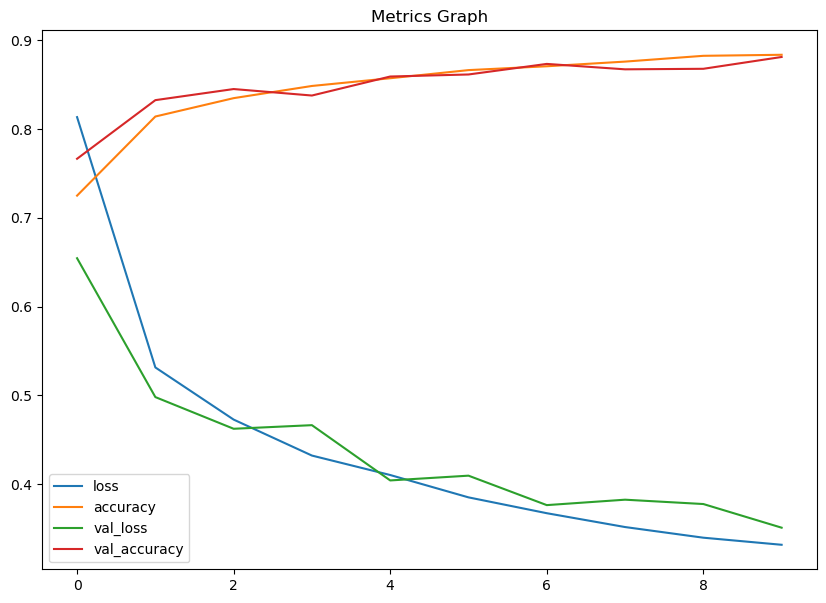

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()


In [15]:
model.evaluate(testX, testY_cat)


313/313 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8811


[0.3511027693748474, 0.8810999989509583]

In [16]:
predictions = model.predict(testX)
predictions = tf.argmax(predictions, axis=1)
y_test = tf.argmax(testY_cat, axis=1)
y_test = tf.Variable(y_test)
print(metrics.accuracy_score(y_test, predictions))

313/313 [==============================] - 1s 2ms/step
0.8811


In [17]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.92      0.71      0.80      1000
           3       0.82      0.91      0.86      1000
           4       0.73      0.87      0.79      1000
           5       0.97      0.98      0.97      1000
           6       0.69      0.67      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



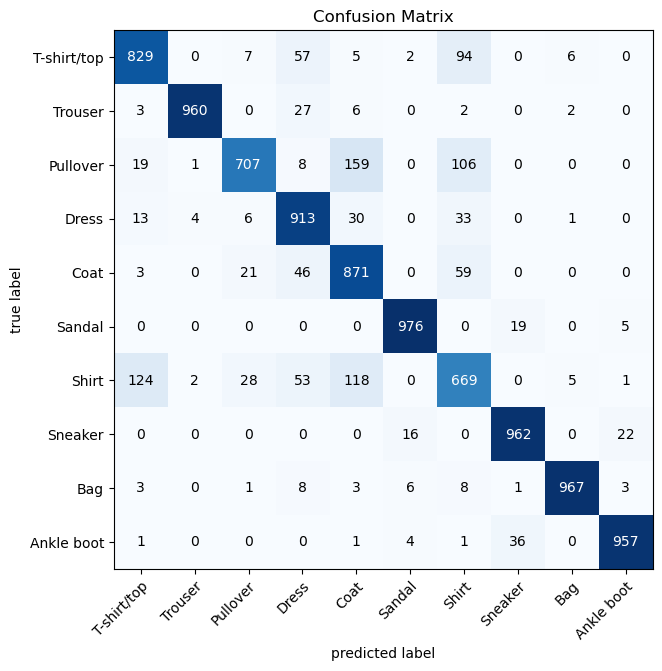

In [21]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()


1/1 [==============================] - 0s 16ms/step


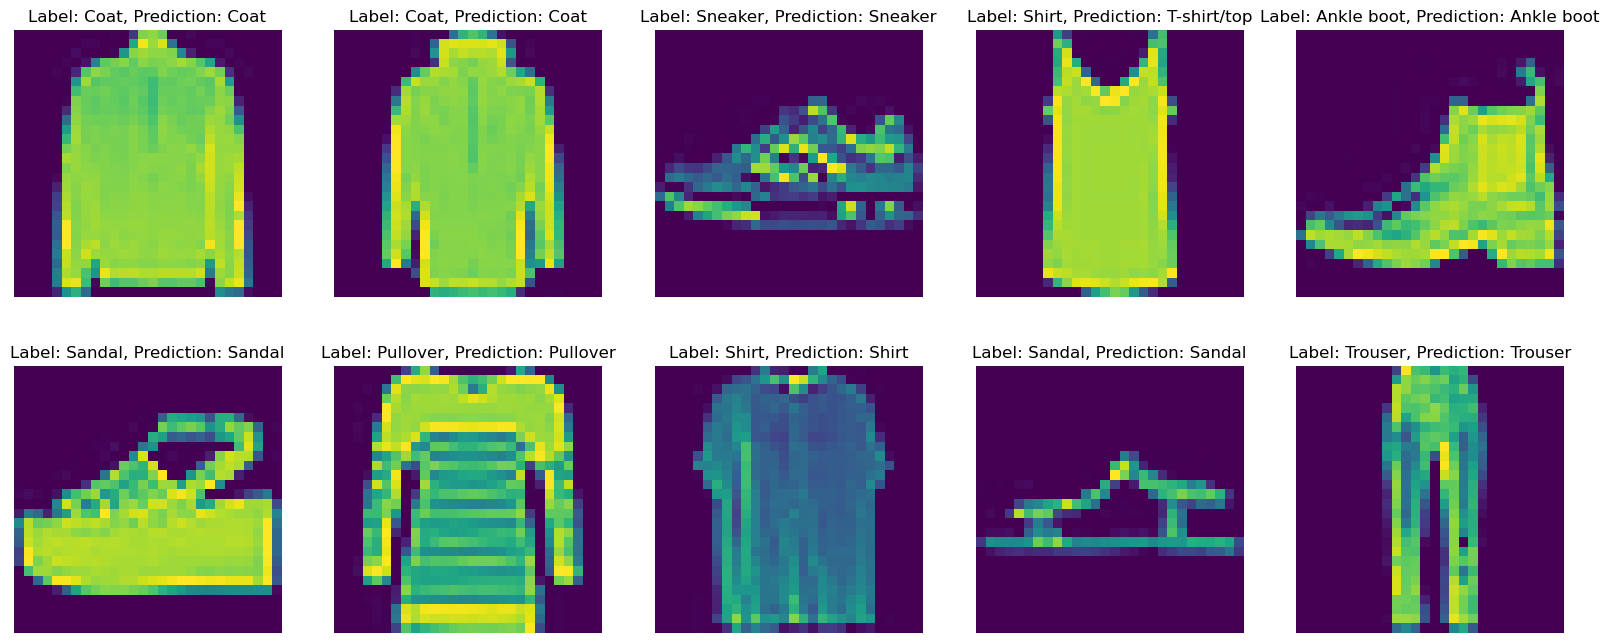

In [24]:
images = []
labels = []
random_indices = random.sample(range(len(testX)), 10)
for idx in random_indices:
    images.append(testX[idx])
    labels.append(testY_cat[idx])
images = np.array(images)
labels = np.array(labels)
fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1 
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1

